In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [3]:
""" 時系列データの作成関数"""
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    # 25データずつ分割
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)
#print(gg.shape)
#print(hh.shape)

In [4]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 1s 7ms/step - loss: 0.5491 - val_loss: 0.1411
Epoch 2/100
158/158 [==============================] - 0s 1ms/step - loss: 0.3514 - val_loss: 0.0511
Epoch 3/100
158/158 [==============================] - 0s 1ms/step - loss: 0.2230 - val_loss: 0.0435
Epoch 4/100
158/158 [==============================] - 0s 1ms/step - loss: 0.1348 - val_loss: 0.1954
Epoch 5/100
158/158 [==============================] - 0s 1ms/step - loss: 0.1258 - val_loss: 0.2256
Epoch 6/100
158/158 [==============================] - 0s 1ms/step - loss: 0.1103 - val_loss: 0.1301
Epoch 7/100
158/158 [==============================] - 0s 1ms/step - loss: 0.0652 - val_loss: 0.0563
Epoch 8/100
158/158 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.0235
Epoch 9/100
158/158 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.0136
Epoch 10/100
158/158 [========================

In [6]:
predicted = model.predict(g)

In [7]:
predicted

array([[ 1.014346  ],
       [ 1.0116638 ],
       [ 1.0046067 ],
       [ 0.9932559 ],
       [ 0.97388864],
       [ 0.9559914 ],
       [ 0.9377019 ],
       [ 0.9173593 ],
       [ 0.8962    ],
       [ 0.87362486],
       [ 0.8500245 ],
       [ 0.82204473],
       [ 0.78274703],
       [ 0.7365122 ],
       [ 0.683029  ],
       [ 0.62242347],
       [ 0.55138916],
       [ 0.4762245 ],
       [ 0.39786565],
       [ 0.32318726],
       [ 0.2526421 ],
       [ 0.19457719],
       [ 0.13955703],
       [ 0.08303791],
       [ 0.02632615],
       [-0.0363498 ],
       [-0.10074908],
       [-0.16401994],
       [-0.22182381],
       [-0.2714906 ],
       [-0.32256398],
       [-0.37166414],
       [-0.4212242 ],
       [-0.4745023 ],
       [-0.5338158 ],
       [-0.59182745],
       [-0.64684874],
       [-0.69506663],
       [-0.7395964 ],
       [-0.77809525],
       [-0.80896884],
       [-0.8345898 ],
       [-0.8630182 ],
       [-0.89243215],
       [-0.9157304 ],
       [-0

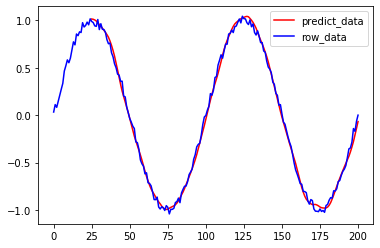

In [8]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()

In [ ]:
"""可変長"""

In [1]:
"""
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Masking
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
import numpy as np
import random

input_dim = 1                # 入力データの次元数：実数値1個なので1を指定
output_dim = 1               # 出力データの次元数：同上
num_hidden_units = 128       # 隠れ層のユニット数
batch_size = 300             # ミニバッチサイズ
num_of_training_epochs = 100 # 学習エポック数
learning_rate = 0.001        # 学習率
num_training_samples = 1000  # 学習データのサンプル数

# データを作成
def create_data(nb_of_samples):
    # 長さを対数正規分布に従って決める
    leng = np.around(np.random.lognormal(np.log(5.0), 0.5, (nb_of_samples, 1))).astype("int")
    max_sequence_len = leng.max()
    # 乱数で {0.0, 1.0} の列を生成する
    X = np.random.randint(0, 2, (nb_of_samples, max_sequence_len)).astype("float32")
    # 長さを超えた部分を-1.0に置き換える
    X[np.arange(max_sequence_len).reshape((1, -1)) >= leng] = -1.0
    # 各行の-1.0を除いた総和を正解ラベルとする
    t = np.ma.array(X, mask=(X == -1.0)).sum(axis=1)
    # LSTMに与える入力は (サンプル, 時刻, 特徴量の次元) の3次元になる。
    return X.reshape((nb_of_samples, max_sequence_len, 1)), t

# 乱数シードを固定値で初期化
random.seed(0)
np.random.seed(0)
tf.set_random_seed(0)

X, t = create_data(num_training_samples)

# モデル構築
model = Sequential()
# パディングの値を指定してMaskingレイヤーを作成する
model.add(Masking(
    input_shape=(None, input_dim),
    mask_value=-1.0))
model.add(LSTM(
    num_hidden_units,
    return_sequences=False))
model.add(Dense(output_dim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=learning_rate))
model.summary()

# 学習
model.fit(
    X, t,
    batch_size=batch_size,
    epochs=num_of_training_epochs,
    validation_split=0.1
)

# 予測
# 任意の長さの入力を受け付ける
test = np.array([1, 1, 1, 0, 1, 0, 1]).astype("float32")
# (a) 長さを変えずに入力
print(model.predict(test.reshape((1, -1, 1))))                                                    # [[4.9639335]]
# (b) 後ろに適当な数の-1.0を追加して入力
print(model.predict(np.pad(test, (0, 10), "constant", constant_values=-1.0).reshape((1, -1, 1)))) # [[4.9639335]]

"""

'\nimport tensorflow as tf\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Masking\nfrom keras.layers.recurrent import LSTM\nfrom keras.optimizers import Adam\nimport numpy as np\nimport random\n\ninput_dim = 1                # 入力データの次元数：実数値1個なので1を指定\noutput_dim = 1               # 出力データの次元数：同上\nnum_hidden_units = 128       # 隠れ層のユニット数\nbatch_size = 300             # ミニバッチサイズ\nnum_of_training_epochs = 100 # 学習エポック数\nlearning_rate = 0.001        # 学習率\nnum_training_samples = 1000  # 学習データのサンプル数\n\n# データを作成\ndef create_data(nb_of_samples):\n    # 長さを対数正規分布に従って決める\n    leng = np.around(np.random.lognormal(np.log(5.0), 0.5, (nb_of_samples, 1))).astype("int")\n    max_sequence_len = leng.max()\n    # 乱数で {0.0, 1.0} の列を生成する\n    X = np.random.randint(0, 2, (nb_of_samples, max_sequence_len)).astype("float32")\n    # 長さを超えた部分を-1.0に置き換える\n    X[np.arange(max_sequence_len).reshape((1, -1)) >= leng] = -1.0\n    # 各行の-1.0を除いた総和を正解ラベルとする\n    t = np.ma.array(X, mask=(X == -1.0